## Finding the center of a circle
Christopher Fichtlscherer, 29.05.2020, fichtlscherer@mailbox.org

In [26]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
import matplotlib.pyplot as plt

### Create Circle Data

In [27]:
def create_circle_array(x_size, y_size, center_x, center_y, thickness, radius):
    """creates a binary, two dim numpy array in which a circle has the
        value 1 all other values are 0"""

    x_mesh, y_mesh = np.mgrid[:x_size, :y_size]

    circle = (x_mesh - center_x) ** 2 + (y_mesh - center_y) ** 2

    c_array = np.logical_and(circle < (radius**2 + thickness), circle > (radius**2 - thickness)).astype(float)

    return c_array

In [66]:
n = 1000 # the number of arrays we want to create

split = 800 # till wich use the data for training
epos = 30

x_size, y_size = 200, 200 # size of the array
center_x, center_y = 100, 100 # center of the circle
delta_x, delta_y = 20, 20 # center will be random in [center_x - delta_x: center_x + delta_x]

thickness = 100 # thickness of the circle
radius = 30 # radius of the circle
delta_r = 10 # radius will be random in [radius - delta_r: radius + delta_r]

noise_level = 1

circles = np.zeros((n, x_size, y_size))
centers = np.zeros((n, 3))

for i in tqdm(range(n)):
    
    cx = center_x + delta_x * (2 * (np.random.random()-0.5))
    cy = center_y + delta_y * (2 * (np.random.random()-0.5))
    r = radius + delta_r * (2 * (np.random.random()-0.5))

    attributes = np.array([cx, cy, r])
    c_array = create_circle_array(x_size, y_size, cx, cy, thickness, r)    

    circles[i] = c_array + noise_level * np.random.random((x_size, y_size))
    centers[i] = attributes

100%|██████████| 1000/1000 [00:01<00:00, 600.62it/s]


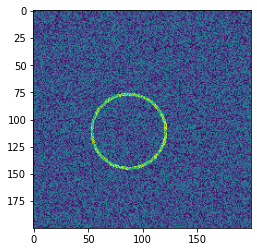

In [67]:
plt.imshow(circles[3])

In [69]:
print(circles.shape)
print(centers.shape)
center_x = centers[:,0]
center_y = centers[:,1]
radii = centers[:,2]

(1000, 200, 200)
(1000, 3)


In [39]:
train_circles, test_circles = circles[:split], circles[split:]
train_radii, test_radii = radii[:split], radii[split:]
train_center_x, test_center_x = center_x[:split], center_x[split:]
train_center_y, test_center_y = center_y[:split], center_y[split:]

***

### Train Radii

In [40]:
# non convolutional network 

model_r = keras.Sequential([
    keras.layers.Flatten(input_shape=(200, 200)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(40)
])

In [41]:
model_r.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model_r.fit(train_circles, train_radii, epochs=epos)

Epoch 1/30
800/800 [==============================] - 2s 2ms/sample - loss: 4.1053 - acc: 0.0000e+00
Epoch 2/30
800/800 [==============================] - 1s 2ms/sample - loss: 2.8306 - acc: 0.0000e+00
Epoch 3/30
800/800 [==============================] - 1s 2ms/sample - loss: 2.2349 - acc: 0.0000e+00
Epoch 4/30
800/800 [==============================] - 1s 2ms/sample - loss: 1.7071 - acc: 0.0000e+00
Epoch 5/30
800/800 [==============================] - 1s 2ms/sample - loss: 1.2186 - acc: 0.0000e+00
Epoch 6/30
800/800 [==============================] - 1s 2ms/sample - loss: 0.8174 - acc: 0.0000e+00
Epoch 7/30
800/800 [==============================] - 1s 2ms/sample - loss: 0.5730 - acc: 0.0000e+00
Epoch 8/30
800/800 [==============================] - 1s 2ms/sample - loss: 0.3422 - acc: 0.0000e+00
Epoch 9/30
800/800 [==============================] - 1s 2ms/sample - loss: 0.1689 - acc: 0.0000e+00
Epoch 10/30
800/800 [==============================] - 2s 2ms/sample - loss: 0.1077 - acc: 

In [43]:
probability_model_r = tf.keras.Sequential([model_r, tf.keras.layers.Softmax()])

In [44]:
predictions_r = probability_model_r.predict(test_circles)
for i in range(10):
    print(np.argmax(predictions_r[i]), test_radii[i])

20 23.43443662869919
39 34.039271485378976
32 32.96631806350792
26 27.203286504458795
27 27.5858247285107
21 21.572584856495137
33 36.998521331271796
26 29.828300864729098
36 35.25284119553006
33 33.21953286703192


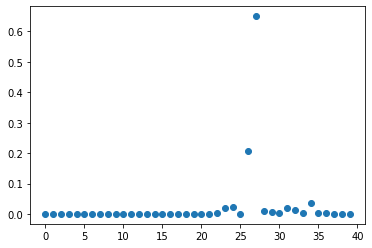

In [45]:
plt.plot(range(40), predictions_r[4], "o")
plt.show()

***

### Train Center X

In [46]:
model_center_x = keras.Sequential([
    keras.layers.Flatten(input_shape=(200, 200)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(130)
])

In [47]:
model_center_x.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model_center_x.fit(train_circles, train_center_x, epochs=epos)

Epoch 1/30
800/800 [==============================] - 1s 2ms/sample - loss: 4.9024 - acc: 0.0000e+00
Epoch 2/30
800/800 [==============================] - 1s 2ms/sample - loss: 3.7182 - acc: 0.0000e+00
Epoch 3/30
800/800 [==============================] - 1s 2ms/sample - loss: 3.4713 - acc: 0.0000e+00
Epoch 4/30
800/800 [==============================] - 1s 2ms/sample - loss: 3.1230 - acc: 0.0000e+00
Epoch 5/30
800/800 [==============================] - 2s 2ms/sample - loss: 2.7693 - acc: 0.0000e+00
Epoch 6/30
800/800 [==============================] - 2s 2ms/sample - loss: 2.3135 - acc: 0.0000e+00
Epoch 7/30
800/800 [==============================] - 1s 2ms/sample - loss: 1.8966 - acc: 0.0000e+00
Epoch 8/30
800/800 [==============================] - 1s 2ms/sample - loss: 1.4450 - acc: 0.0000e+00
Epoch 9/30
800/800 [==============================] - 1s 2ms/sample - loss: 1.1082 - acc: 0.0000e+00
Epoch 10/30
800/800 [==============================] - 1s 2ms/sample - loss: 0.8477 - acc: 

In [49]:
probability_model_center_x = tf.keras.Sequential([model_center_x, tf.keras.layers.Softmax()])

In [50]:
predictions_x = probability_model_center_x.predict(test_circles)
for i in range(10):
    print(np.argmax(predictions_x[i]), test_center_x[i])

91 92.9447020637406
119 119.68893707393141
100 99.3556266391049
85 84.5983248189469
88 87.55897516608502
112 113.4824041919334
95 92.62644687867453
107 109.36843383769806
92 93.44434065902003
97 99.73599689883056


***

### Train Center Y

In [51]:
model_center_y = keras.Sequential([
    keras.layers.Flatten(input_shape=(200, 200)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(130)
])

In [52]:
model_center_y.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model_center_y.fit(train_circles, train_center_y, epochs=epos)

Epoch 1/30
800/800 [==============================] - 1s 2ms/sample - loss: 4.8316 - acc: 0.0000e+00
Epoch 2/30
800/800 [==============================] - 1s 2ms/sample - loss: 3.6259 - acc: 0.0000e+00
Epoch 3/30
800/800 [==============================] - 1s 2ms/sample - loss: 2.9519 - acc: 0.0000e+00
Epoch 4/30
800/800 [==============================] - 1s 2ms/sample - loss: 2.4009 - acc: 0.0000e+00
Epoch 5/30
800/800 [==============================] - 1s 2ms/sample - loss: 1.8984 - acc: 0.0000e+00
Epoch 6/30
800/800 [==============================] - 1s 2ms/sample - loss: 1.3642 - acc: 0.0000e+00
Epoch 7/30
800/800 [==============================] - 1s 2ms/sample - loss: 0.9050 - acc: 0.0000e+00
Epoch 8/30
800/800 [==============================] - 2s 2ms/sample - loss: 0.6021 - acc: 0.0000e+00
Epoch 9/30
800/800 [==============================] - 2s 2ms/sample - loss: 0.3896 - acc: 0.0000e+00
Epoch 10/30
800/800 [==============================] - 1s 2ms/sample - loss: 0.2228 - acc: 

In [54]:
probability_model_center_y = tf.keras.Sequential([model_center_y, tf.keras.layers.Softmax()])

In [55]:
predictions_y = probability_model_center_y.predict(test_circles)
for i in range(10):
    print(np.argmax(predictions_y[i]), test_center_y[i])

81 82.78534686418776
84 84.23251256596663
113 113.07847329791355
97 97.73417326321554
97 97.66756407350884
119 118.59729437261693
95 88.16431120008143
117 119.7073006199777
117 114.64371810183036
100 101.23814210788136


***

### Plot a box around the Circle

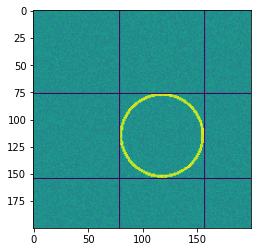

In [65]:
circle_number = 199

x_1 = np.argmax(predictions_x[circle_number]) - np.argmax(predictions_r[circle_number])
x_2 = np.argmax(predictions_x[circle_number]) + np.argmax(predictions_r[circle_number])

y_1 = np.argmax(predictions_y[circle_number]) - np.argmax(predictions_r[circle_number])
y_2 = np.argmax(predictions_y[circle_number]) + np.argmax(predictions_r[circle_number])

w_image = test_circles[circle_number]
w_image[:,y_1] =-1
w_image[:,y_2] =-1
w_image[x_1-1 : x_1] =-1
w_image[x_2-1 : x_2] =-1

plt.imshow(w_image)

***

### Convolutional Networks


In [61]:
train_circles_ex = np.expand_dims(train_circles, axis=3)
test_circles_ex = np.expand_dims(test_circles, axis=3)

In [62]:
num_filters = 8 # how to choose?
filter_size = 30 # how to choose?
pool_size = 2   # how to choose?

model_conv_r = keras.Sequential([
    keras.layers.Conv2D(num_filters, filter_size, input_shape=(200, 200, 1)),
    keras.layers.MaxPooling2D(pool_size=pool_size),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(40)
])

In [63]:
model_conv_r.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
model_conv_r.fit(train_circles_ex, train_radii, epochs=10)

Epoch 1/10
800/800 [==============================] - 9s 11ms/sample - loss: 5.0575 - acc: 0.0000e+00
Epoch 2/10
800/800 [==============================] - 8s 10ms/sample - loss: 2.6908 - acc: 0.0000e+00
Epoch 3/10
800/800 [==============================] - 8s 10ms/sample - loss: 2.1057 - acc: 0.0000e+00
Epoch 4/10
800/800 [==============================] - 9s 11ms/sample - loss: 1.5542 - acc: 0.0000e+00
Epoch 5/10
800/800 [==============================] - 9s 11ms/sample - loss: 1.1246 - acc: 0.0000e+00
Epoch 6/10
800/800 [==============================] - 9s 11ms/sample - loss: 0.6826 - acc: 0.0000e+00
Epoch 7/10
800/800 [==============================] - 9s 11ms/sample - loss: 0.4068 - acc: 0.0000e+00
Epoch 8/10
800/800 [==============================] - 9s 11ms/sample - loss: 0.2313 - acc: 0.0000e+00
Epoch 9/10
800/800 [==============================] - 9s 11ms/sample - loss: 0.1452 - acc: 0.0000e+00
Epoch 10/10
800/800 [==============================] - 11s 13ms/sample - loss: 0.0

In [ ]:
model_center_x = keras.Sequential([
    keras.layers.Flatten(input_shape=(200, 200)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3)
])

# loss function mean square error

#model_center_y.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])